#SEGUNDA AVALIAÇÃO - Valdemar Gonçalves Pereira Neto

## Trabalho referente a disciplina de Análise de Sinais e Sistemas, ministrada pelo Prof. Dr. Paulo Sergio da Motta Pires, lotado no departamento de Computação e Automação (DCA).
## Esse trabalho tem como finalidade utilizar alguma linguagem de programação para resolver questões de analise de sinais e sistemas, referente ao conteúdo de Série de Fourier. A pontuação máxima desse trabalho, na unidade, é de dois pontos na média.




# A partir desse sinal:
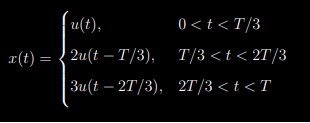
# Temos que responder as seguintes alternativas:
## a) Desenhe x(t);
## b) Obtenha os coeficientes da série exponencial de Fourier;
## c) Desenhe os espectros de amplitude e de fase.



## A primeira solução para desenhar o sinal poder ser tanto implementado utilizando a definicão de função no python com comandos iterativos e condicionais.


## Definindo a função períodica com comando condicionais sem uso de uma módulo qualquer biblioteca no python

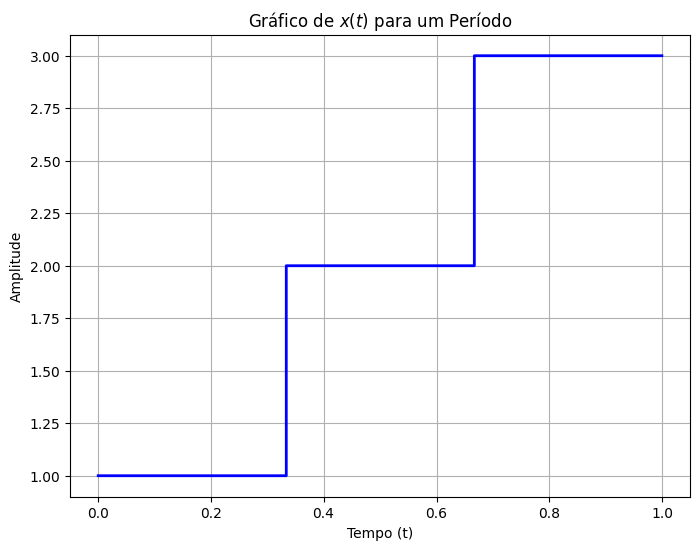

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Período da função periódica
T = 1.0

# Definindo a função periódica x(t)
def x(t):
    if 0 < t < T/3:
        return 1
    elif T/3 <= t < 2*T/3:
        return 2
    elif 2*T/3 <= t < T:
        return 3

# Vetor de tempo para um período (por exemplo, de 0 a T com incrementos pequenos)
t = np.linspace(0, T, 1000, endpoint=False)

# Calculando os valores de x(t) para o vetor de tempo
x_values = np.vectorize(x)(t)

# Plotando x(t)
plt.figure(figsize=(8, 6))
plt.plot(t, x_values, color='b', linewidth=2, drawstyle='steps-post')
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title('Gráfico de $x(t)$ para um Período')
plt.grid(True)
plt.show()


## Para responder a alternativa 'a', porém utilizando a função piecewise  presente na biblioteca sympy no python

<ipython-input-16-ad12a9e0bf2e>:10: DeprecationWarning: scipy.piecewise is deprecated and will be removed in SciPy 2.0.0, use numpy.piecewise instead
  return piecewise(t, [t < T/3, (t >= T/3) & (t < 2*T/3), t >= 2*T/3], [1, 2, 3])


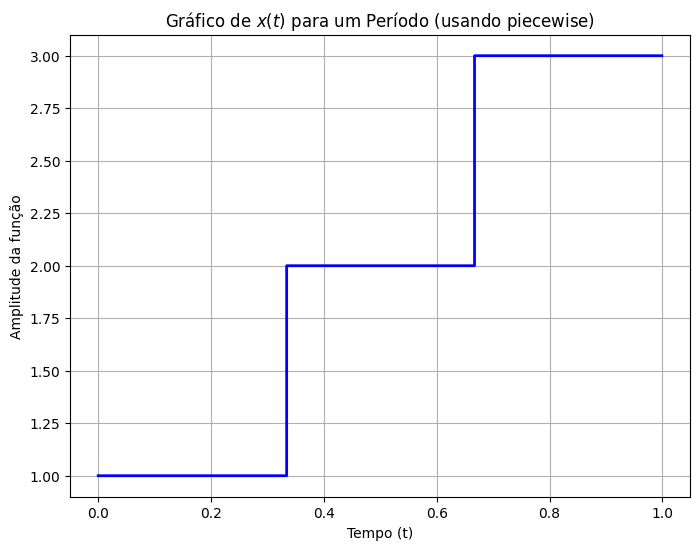

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import piecewise

# Período da função periódica
T = 1.0

# Definindo a função periódica x(t) usando piecewise
def x(t, T):
    return piecewise(t, [t < T/3, (t >= T/3) & (t < 2*T/3), t >= 2*T/3], [1, 2, 3])

# Vetor de tempo para um período (por exemplo, de 0 a T com incrementos pequenos)
t = np.linspace(0, T, 1000, endpoint=False)

# Calculando os valores de x(t) para o vetor de tempo
x_values = x(t, T)

# Plotando x(t)
plt.figure(figsize=(8, 6))
plt.step(t, x_values, where='post', color='b', linewidth=2)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude da função')
plt.title('Gráfico de $x(t)$ para um Período (usando piecewise)')
plt.grid(True)
plt.show()


## Obtendo os coeficientes da série de Fourier, para isso irei criar uma função que calcula esses coeficientes, com um numero de temos igual a 10 (dez).

In [24]:
# Número de termos da série de Fourier
num_terms = 10

# Coeficientes da série de Fourier
def fourier_coefficient(n):
    integrand = lambda t: x(t, T) * np.exp(-1j * 2 * np.pi * n * t / T)
    coef = integrate.quad(integrand, 0, T)[0] / T
    return coef

# Calcular coeficientes para os primeiros num_terms
coefficients = [fourier_coefficient(n) for n in range(-num_terms, num_terms + 1)]

# Frequências correspondentes aos coeficientes
frequencies = [n / T for n in range(-num_terms, num_terms + 1)]

# Coeficientes com a sua respectiva frequência
for coeficiente, frequencia in zip(coefficients, frequencies):
  print(f'Coeficiente {coeficiente} com frequência = {frequencia}')

Coeficiente -2.1507610036381925e-16 com frequência = -10.0
Coeficiente -1.2157520360804125e-16 com frequência = -9.0
Coeficiente -6.221758563747668e-16 com frequência = -8.0
Coeficiente -2.7234107225274674e-16 com frequência = -7.0
Coeficiente -1.3877787807814457e-17 com frequência = -6.0
Coeficiente -2.8689436997772414e-17 com frequência = -5.0
Coeficiente -3.6005013262164554e-16 com frequência = -4.0
Coeficiente -2.382582580074284e-16 com frequência = -3.0
Coeficiente 5.551115123125783e-17 com frequência = -2.0
Coeficiente 0.0 com frequência = -1.0
Coeficiente 2.0 com frequência = 0.0
Coeficiente 0.0 com frequência = 1.0
Coeficiente 5.551115123125783e-17 com frequência = 2.0
Coeficiente -2.382582580074284e-16 com frequência = 3.0
Coeficiente -3.6005013262164554e-16 com frequência = 4.0
Coeficiente -2.8689436997772414e-17 com frequência = 5.0
Coeficiente -1.3877787807814457e-17 com frequência = 6.0
Coeficiente -2.7234107225274674e-16 com frequência = 7.0
Coeficiente -6.221758563747668

<ipython-input-16-ad12a9e0bf2e>:10: DeprecationWarning: scipy.piecewise is deprecated and will be removed in SciPy 2.0.0, use numpy.piecewise instead
  return piecewise(t, [t < T/3, (t >= T/3) & (t < 2*T/3), t >= 2*T/3], [1, 2, 3])


## Calculando e plotando os espectors de amplitude e fase

<ipython-input-26-ff588dd989cf>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, amplitudes, use_line_collection=True)
<ipython-input-26-ff588dd989cf>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, phases, use_line_collection=True)


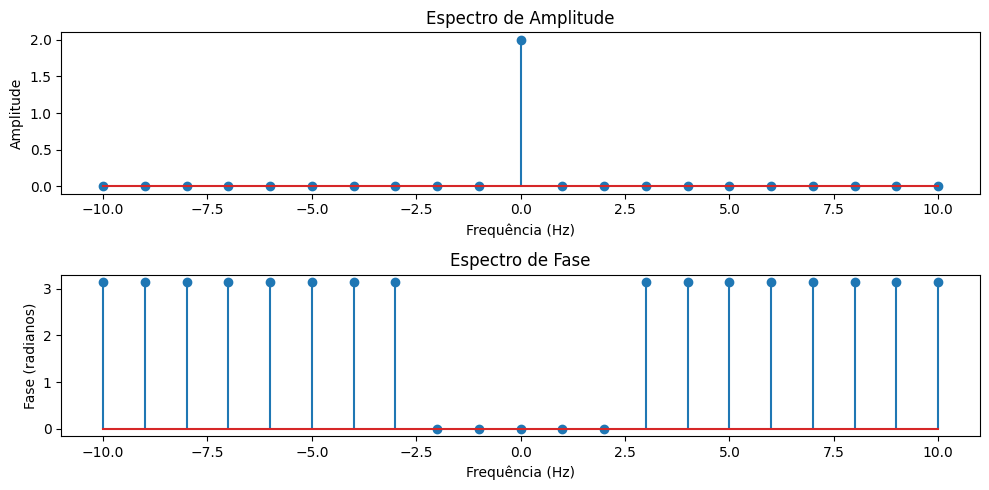

In [26]:
amplitudes = np.abs(coefficients)
phases = np.angle(coefficients)

# Desenhar espectro de amplitude
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(frequencies, amplitudes, use_line_collection=True)
plt.title('Espectro de Amplitude')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')

# Desenhar espectro de fase
plt.subplot(2, 1, 2)
plt.stem(frequencies, phases, use_line_collection=True)
plt.title('Espectro de Fase')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (radianos)')

plt.tight_layout()
plt.show()
